In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
os.path.dirname(sys.executable)
sys.path.append('/kuacc/users/baristopal20/SSuperGAN/')

In [3]:
from data.datasets.random_dataset import RandomDataset
from data.datasets.golden_panels import GoldenPanelsDataset
from data.augment import get_PIL_image

from networks.ssupervae import SSuperVAE
from training.vae_trainer import VAETrainer
from utils.config_utils import read_config, Config
from utils.logging_utils import *
from utils.plot_utils import *
from utils import pytorch_util as ptu

from configs.base_config import *
from functional.losses.elbo import elbo

In [4]:
config = read_config(Config.SSUPERVAE)
golden_age_config = read_config(Config.GOLDEN_AGE)

In [5]:
net = SSuperVAE(config.backbone, 
                latent_dim=config.latent_dim, 
                embed_dim=config.embed_dim,
                use_lstm=config.use_lstm,
                seq_size=config.seq_size,
                decoder_channels=config.decoder_channels,
                gen_img_size=config.image_dim,
                lstm_hidden=config.lstm_hidden,
                lstm_dropout=config.lstm_dropout,
                fc_hidden_dims=config.fc_hidden_dims,
                fc_dropout=config.fc_dropout,
                num_lstm_layers=config.num_lstm_layers,
                masked_first=config.masked_first).to(ptu.device) 

net.load_state_dict(torch.load("plain_checkpoints/11-05-2021-12-35-34_model-checkpoint-epoch85.pth")['model_state_dict'])
net = net.cuda().eval()

Loaded pretrained weights for efficientnet-b5


In [6]:
dataset = GoldenPanelsDataset(golden_age_config.panel_path,
                              golden_age_config.sequence_path, 
                              golden_age_config.panel_dim,
                              config.image_dim, 
                              augment=False, 
                              mask_val=1, # mask with white color for 1 and black color for 0
                              mask_all=False, # masks faces from all panels and returns all faces
                              return_mask=True,
                              train_test_ratio=golden_age_config.train_test_ratio,
                              train_mode=False,
                              limit_size=-1)

data_loader = DataLoader(dataset, batch_size=1)

In [7]:
dl_iter = iter(data_loader)

## Masking Test

In [ ]:
plot_panels_and_faces(x, y, z.unsqueeze(0).repeat(1, 3, 1, 1))

## Model Result Test

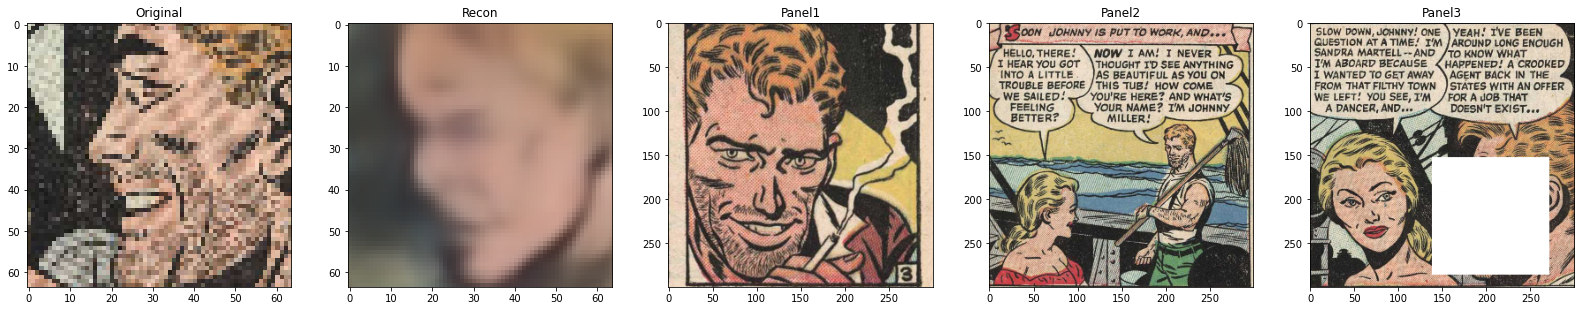

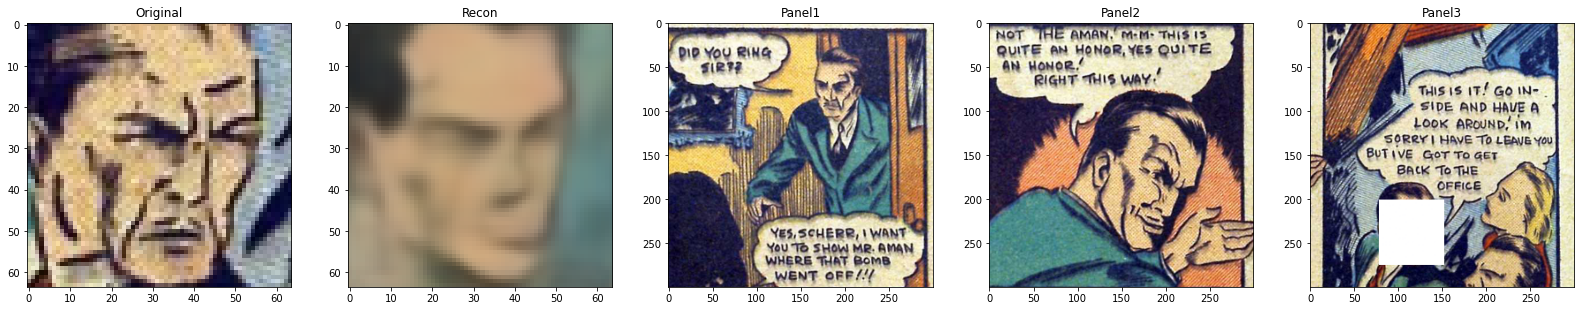

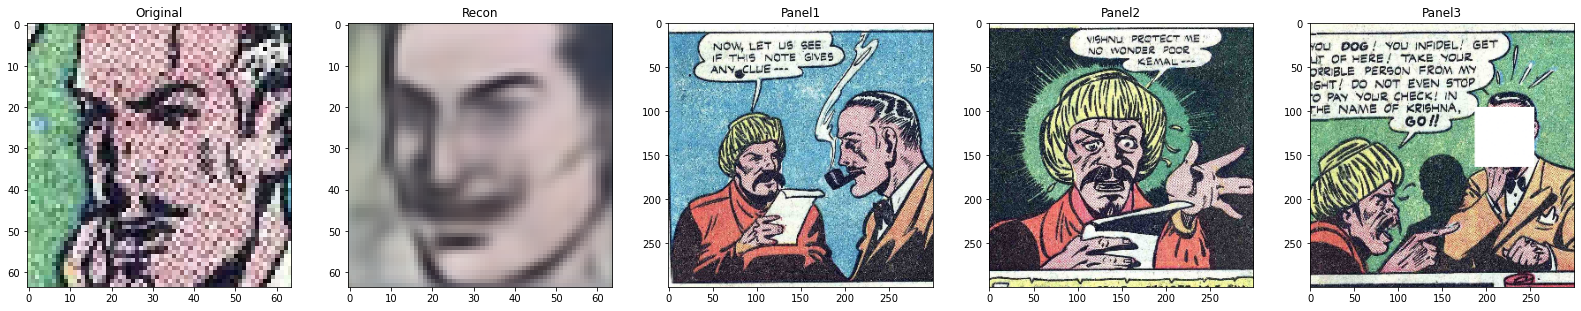

In [8]:
ctr, limit = 0, 3

for _ in range(limit):
    x, y, z = next(dl_iter)
    
    with torch.no_grad():
        _, _, _, y_recon, _ = net(x.cuda())   
    plot_panels_and_faces(x, y, y_recon)

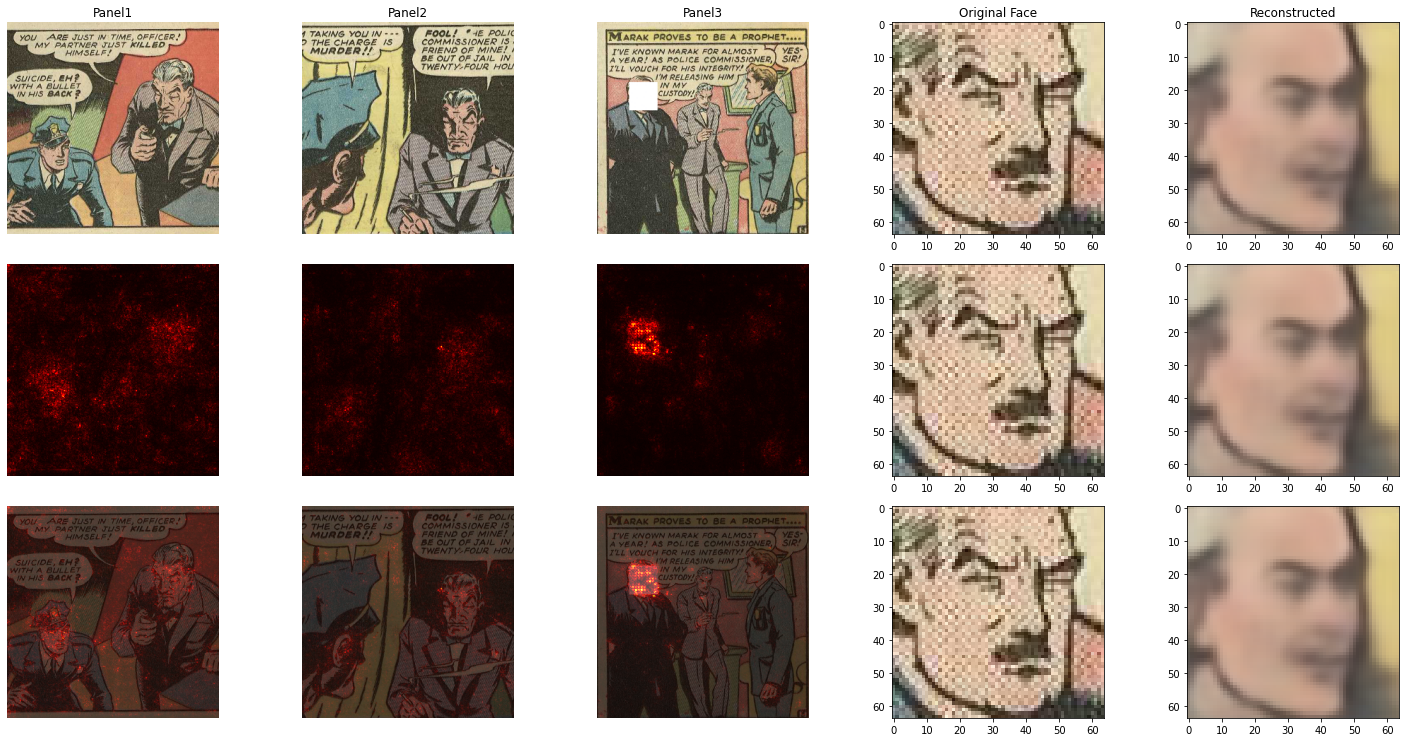

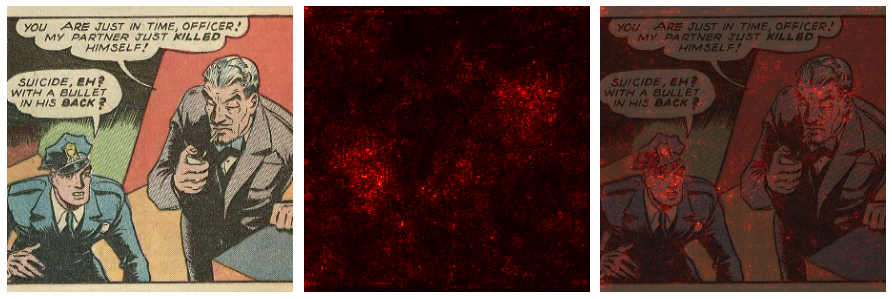

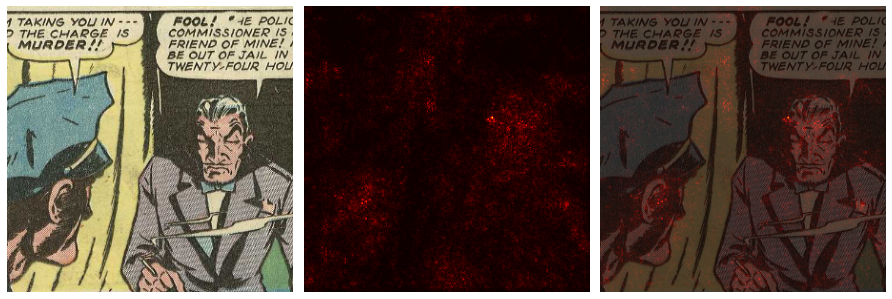

In [9]:
x, y, z = next(dl_iter)
draw_saliency(net, x, y)
draw_backbone_saliency(net.encoder.embedder, x, 0)
draw_backbone_saliency(net.encoder.embedder, x, 1)

In [ ]:
x = torch.randn(2, 3, 5)
x[0,:,:]

In [ ]:
x[1,:,:]

In [ ]:
x = x[:,[-1, *np.arange(2)],:]

In [ ]:
x[0,:,:]

In [ ]:
x[1,:,:]